In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.interpolate import splrep, splev, UnivariateSpline
data=np.loadtxt("fs8z_rec.dat")
z=data[:,0]
fs8=data[:,1]
sigma=data[:,2]
print(len(z))

200


In [2]:
dic= {"z":z,"fs8":fs8, "sigma": sigma}
df=pd.DataFrame.from_dict(dic)

In [3]:
newdf =df.sort_values(by="z")
z= np.array(newdf.z)
fs8=np.array(newdf.fs8)
sigma=np.array(newdf.sigma)

In [4]:
delp=[]
delta=[]
sigma8_0= 0.8
del_0 =1
om0= 0.3
print('ruchika')
delp_0 =1

deltap = -(del_0/sigma8_0)*(fs8/(1.+z))

ruchika


-0.49350439757583686


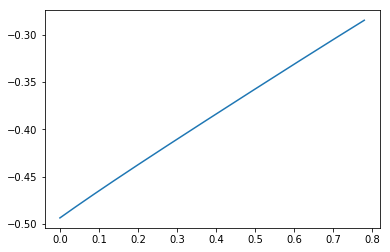

In [6]:
def delp(z1):
    delp1 = UnivariateSpline(z,deltap, k=3, s=0)
    return delp1(z1)
print(delp(0.0))
import matplotlib.pyplot as plt
plt.plot(z,delp(z))


0.3948035180606695
200


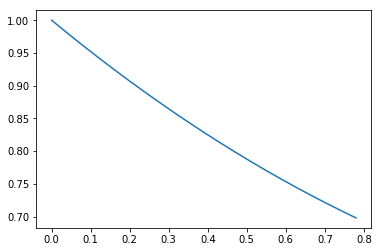

In [7]:
############################################################chk after that

def funcfs8(z1):#making spline of integral for equatin 12
 fs81= UnivariateSpline(z, fs8/(1.+z), k=3, s=0)
 return fs81(z1)

print(funcfs8(0))
#simply integrating and getting equation 12
for i in range(len(z)):
 int1 = quad(funcfs8, 0, z[i])[0]
 delta1= del_0 -(del_0/sigma8_0)*int1
 delta.append(delta1)

print(len(delta))
plt.plot(z,delta)

In [8]:
def intfunc(z1):
    int1 = UnivariateSpline(z, (delta*(-deltap)/(1.+z)), k=3, s=0)
    int2 = quad(int1,0,z1)[0]                        
    return int2

print(intfunc(0))

0.0


In [17]:
firstterm= (1.+z)**2.*((delp(0)**2./(delp(z)**2.)))


In [20]:
vintfunc = np.vectorize(intfunc)   
secondterm = -3.*om0*((1.+z)**2./(delp(z)**2.))*vintfunc(z)
                       
def Hubble_Constant():
 return (firstterm +secondterm) 

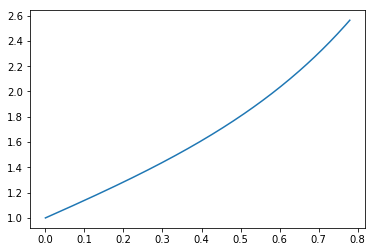

In [21]:
plt.plot(z,Hubble_Constant())